# <center>**Kap kiše**</center>

Bavićemo se problemom određivanja brzine kišne kapi pri slobodnom padu.
<br>
* Pojednostavljeni modeli:
    * MODEL BEZ OTPORA VAZDUHA
    * MODEL SA KONSTANTNOM BRZINOM
    <br><br><br>
    * POTPUNI MODEL 
<br>
* Poređenje sva tri modela grafički

* Potpuni model - Simulacija kiše 

![Sile koje deluju na kaplicu](sile.jpg)

Gde je $\mathbf{F_D} = -k_v v(t) \mathbf{j}$ sila otpora vazduha i $\mathbf{G} = -m g \mathbf{j} $ sila gravitacije,
<br>
$k_v$ predstavlja koeficijent otpora vazduha, a sa $\mathbf{j}$ označavamo vertikalni pravac vektora.
<br>
<small>Vektore smo označili podebljanim slovima.</small>

**Drugi Njutnov zakon:** Primenjujemo drugi Njutnov zakon kako bismo našli ubrzanje kapljice: <br>
$\mathbf{F}^{net} = \mathbf{F_D} + \mathbf{G} = -mg \mathbf{j} - k_vv(t) \mathbf{j} = ma \mathbf{j}$

# <center>**Model: Bez otpora vazduha**</center>

Šta se dešava kada je otpor vazduha nula tj. $k_{v}=0$ ?
<br>
Tada je ubrzanje konstantno i iznosi $a=-g$
<br>
Znamo takođe $a = \frac{dv}{dt}$, iz ove dve jednakosti imamo $dv = -gdt$ i
<br>
integraljenjem dobijamo,
$$ v(t) - v(0) = \int_{0}^{t} a \, dt = -gt $$
Ovo će biti dobra aproksimacija samo ako je $k_{v}v(t)$ zanemarljivo malo u odnosu na $mg$ tj.
\begin{align*}
k_{v} \cdot v &\ll mg \Rightarrow v \ll \frac{5.24 \times 10^{-7} \, \text{kg} \times 9.8 \, \text{m/s}^2}{1.85 \times 10^{-7} \, \text{N} \cdot \text{s/m}} \approx 27.8 \, \text{m/s}. \\
\end{align*}
<br>
Uzimamo, $m = 5.24 \times 10^{-7}$ - masa kapljice  i  $k_{v}=1.85 \times 10^{-7}$ - koeficijent otpora vazduha.


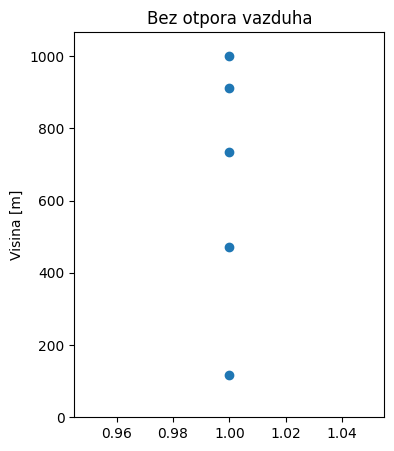

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# BEZ OTPORA
g = 9.81   
m = 5.24e-7  #  masa kapljice
kv = 0  

dt = 3

# pocetni uslovi
h = 1000 #m
v = 0
t = 20.0
n = int(round(t/dt))

H = []

for i in range(n-1):
    h += v * dt 
    g += - (kv/m)*v # ovo ce uvek biti nula! tj g je const
    v -= g * dt 

    H.append(h)


plt.figure(figsize=(4,5))
plt.scatter(np.ones_like(H),H)
plt.title('Bez otpora vazduha')
plt.ylabel('Visina [m]')
plt.ylim(0)
plt.show()

# <center>**Model: Konstantna brzina**</center>

Šta će ce dogoditi kada kap kiše počne da pada?
<br>
Početna brzina je nula, stoga će i početno ubrzanje biti $a = -g - \frac{k_{v}}{m}v = -g$. <br>
Kako kap pada, brzina će postati negativan broj, ali sa povećanom veličinom. Ubrzanje $a = -g - \frac{k_{v}}{m}v$ će se stoga približavati nuli. Međutim, ako ubrzanje postane nula, brzina se više neće menjati i kap će dostići **stacionarnu** brzinu - brzinu koja se ne menja vremenom. Ovo se dešava kada<br>
$a = -g - \frac{k_{v}}{m}v = 0 \Rightarrow -g = \frac{k_{v}}{m}v 	\Rightarrow v = -\frac{mg}{k_{v}}$.<br>
Ovu brzinu nazivamo terminalnom brzinom, $v_{T}$:<br>
$v_{T} = \frac{mg}{k_{v}}$.<br>
Stoga očekujemo da će se brzina kapi približavati brzini $v = -v_{T}$ kako vreme teče.

# **<center>Potpuni model - Numeričko rešenje**</center>

Poznato nam je početno ponašanje, $a = -g$, i asimptotsko ponašanje, $a \to 0m/s^{2}, v \to -v_{T}$. Možemo da nađemo brzinu rešenjem jednačine<br><center>
$a = \frac{dv}{dt} = -g-\frac{k_{v}}{m}v$, <br></center>
sa početnim uslovom $v(t_{0}) = 0$ korišćenjem Ojlerove metode:<br><center>
$v(t_{i}+\Delta t) = v(t_i) + \Delta t \cdot a(t_i, v(t_i))$</center>

## Analiza numeričkog rešenja

Možemo primetiti da se $v(t)$ i $a(t)$ ponašaju očekivano. Pad počinje sa brzinom nula i sa inicijalnim ubrzanjem od $-g$. Ubrzanje se smanjuje kako se brzina uvećava i kap dostiže stacionarno stanje gde se pomera konstantnom brzinom.<br>
Poredimo dva uprošćena modela. Ponašanje bez otpora vazduha je prikazano grafikonom sa isprekidanom linijom i predstavlja razumnu aproksimaciju za manje brzine, tj. kada je $\mid v\mid \ll v_T = 27.5 m/s$. Dugo vremena brzina se približava $v \to v_T$, što je ilustrovano tačkastom linijom. Uprošćeni modeli su nam korisni, jer pomoću njih možemo da proverimo da li nam je numeričko rešenje korektno.

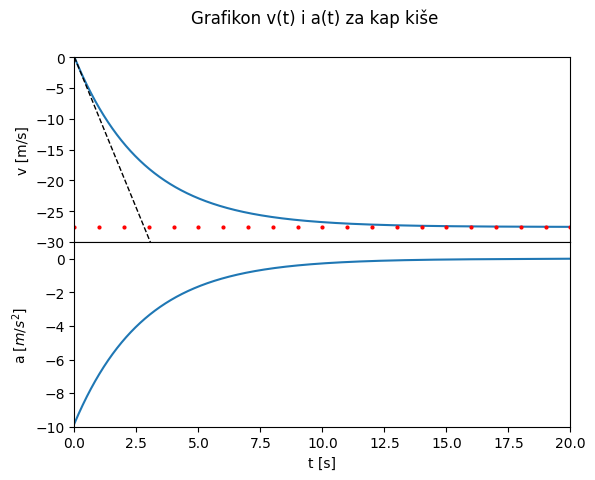

In [6]:
from pylab import *
import matplotlib.pyplot as plt
import numpy as np

g = 9.81
kv = 1.85e-7 # Nsmˆ-2
m = 5.2e-7 # kg
time = 20.0
dt = 0.001
v0 = 0.0
n = int(round(time/dt))
v = zeros(n, float)
a = zeros(n, float)
t = zeros(n, float)
v[0] = v0
for i in range(n-1):
    a[i] = -g - (kv/m)*v[i]
    v[i+1] = v[i] + a[i]*dt
    t[i+1] = t[i] + dt

fig, (ax1, ax2) = plt.subplots(2)
plt.suptitle('Grafikon v(t) i a(t) za kap kiše')
plt.subplots_adjust(hspace=0)

ax1.plot(t, v)
ax1.set_ylabel('v [m/s]')
ax1.set_xlim(0, 20)
ax1.set_ylim(-30, 0)
ax1.set_xticks([])

ax2.plot(t, a)
plt.xlabel('t [s]')
ax2.set_ylabel('a [$m/s^2$]')
ax2.set_xlim(0, 20)
ax2.set_ylim(-10, 1)

kv = 0 # Nsmˆ-2
v = zeros(n, float)
a = zeros(n, float)
t = zeros(n, float)
v[0] = v0
for i in range(n-1):
    a[i] = -g - (kv/m)*v[i]
    v[i+1] = v[i] + a[i]*dt
    t[i+1] = t[i] + dt

ax1.plot(t, v, linestyle='--', linewidth=1.0, color='black')

kv = 1.85e-7 # Nsmˆ-2
y=-m*g/kv
ax1.plot(np.arange(0, n, 1), np.array([y for i in range(n)]), 'ro', markersize=2, markevery=1)

plt.show()

# <center>**Poređenje sva tri modela grafički**</center>

Dole možemo da uporedimo sva tri modela: model koji ne uzima u obzir otpor vazduha, model konstantne brzine (pri čemu smo uzeli da je brzina u svakom trenutku jednaka $v_{T} = \frac{mg}{k_{v}}$) i potpuni model - numeričko rešenje.

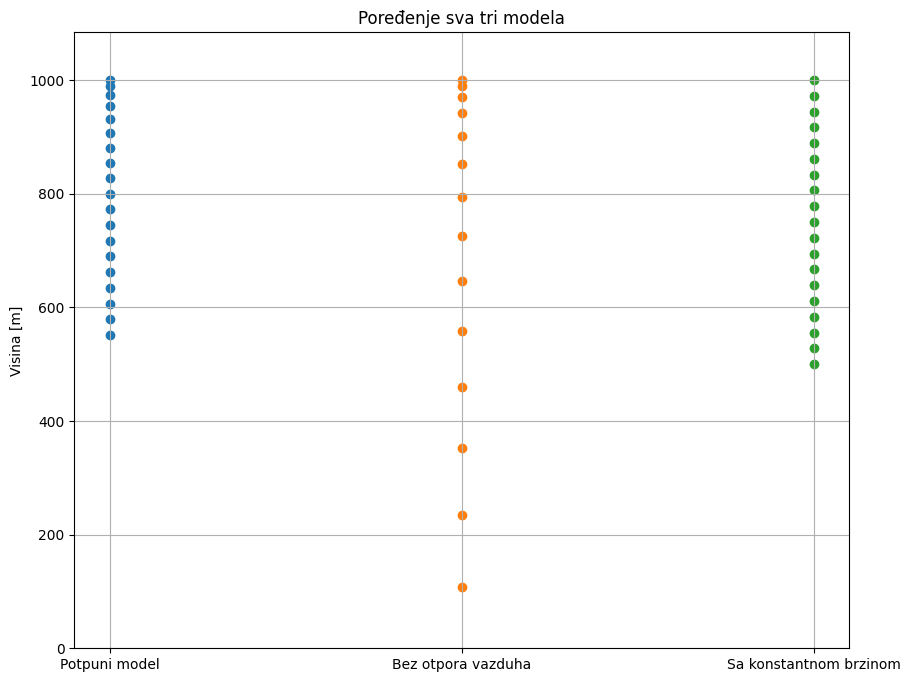

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

# BEZ OTPORA
g = 9.81   
m = 5.24e-7  #  masa kapljice
kv = 0 

dt = 1

# pocetni uslovi
h = 1000 #m
v = 0
t = 20.0
n = int(round(t/dt))

H1 = []

for i in range(n-1):
    h += v * dt
    g += - (kv/m)*v 
    v -= g * dt

    H1.append(h)

# CONST BRZINA
kv = 1.85e-7
t = 20.0
n = int(round(t/dt))
v = 0
h = 1000

H2 = []
for i in range(n-1):
    h += v*dt
    v = -m*g/kv  # terminalna brzina

    H2.append(h)

# POTPUNI MODEL
v0 = 0.0
h = 1000
t = 20.0
n = int(round(t/dt))

v = []
a = []

v.append(v0)

H3 = []

for i in range(n-1):
    h += v[-1]*dt  
    a.append(-g - (kv/m)*v[-1])
    v.append(v[-1] + a[-1]*dt)

    H3.append(h)

plt.figure(figsize=(10, 8))

plt.scatter(np.ones_like(H3), H3)
plt.scatter(2*np.ones_like(H1), H1)
plt.scatter(3*np.ones_like(H2), H2)

plt.title('Poređenje sva tri modela')
plt.ylabel('Visina [m]')
plt.ylim(0)
plt.xticks([1, 2, 3], ['Potpuni model', 'Bez otpora vazduha', 'Sa konstantnom brzinom'])
plt.grid(True)
plt.show()

# <center>**Potpuni model - Simulacija kiše**</center>

Za kraj, možemo da pogledamo simulaciju pada jedne kapljice kiše.

In [8]:
import pygame
import random
import sys

g = 9.81   #(m/s^2)
m = 5.24e-7  #(kg)
kv = 1.85e-7  #(Nsm^-1)
pixel = 0.0002645833 #(m)

class Rain(pygame.sprite.Sprite):
    def __init__(self):
        pygame.sprite.Sprite.__init__(self)
        self.image = rain_img
        self.rect = self.image.get_rect()
        self.speedy = 0 #random.randint(5,25)
        self.rect.x = random.randint(-100,wn_width)
        self.rect.y = 0 #-wn_height
        self.time = 0

    def update(self,dt):
        
        if self.rect.bottom > wn_height:
            print(self.speedy)
            print(self.time)
            self.speedy = 0 #random.randint(5,25)
            self.rect.x = random.randint(-wn_width,wn_width)
            self.rect.y = 0
            self.time=0
            
        self.acceleration = g - (random.randint(97,103)*(kv/m)*self.speedy)/100
        self.speedy = self.speedy + self.acceleration*dt
        self.rect.y = self.rect.y + self.speedy*dt/pixel
        self.time+=dt

pygame.init()

clock = pygame.time.Clock()

WHITE = (255, 255, 255)

rain_img = pygame.image.load('kap.png')

wn_width = 700
wn_height = 1000
wn = pygame.display.set_mode((wn_width,wn_height))
pygame.display.set_caption('Kapljice Kise')

rain_group = pygame.sprite.Group()

brojKapi=1

for i in range(brojKapi):
    rain = Rain()
    rain_group.add(rain)

running = True

clock.tick()
print(1000*pixel)
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False	
            pygame.quit()
            sys.exit()
            #quit()
    if running:

        dt=clock.tick(120)
        rain_group.update((dt/1000.0))

        wn.fill(WHITE)
        rain_group.draw(wn)
        pygame.display.flip()
            
pygame.quit()
quit()

0.26458329999999997
2.206603946046839
0.23400000000000015
2.215026472729219
0.23500000000000013
2.2058702661052183
0.23400000000000015
2.2066701083229145
0.23400000000000015
2.1698394775107395
0.2300000000000001
2.215217092694387
0.23500000000000013
2.1522160953720086
0.22800000000000012
2.1429210210036786
0.22700000000000015
2.178718821919321
0.23100000000000012
2.152668298946923
0.2280000000000001
2.21508315042138
0.23500000000000013
2.161590223417389
0.22900000000000015
2.2060483154511648
0.23400000000000012
2.2061660784180255
0.23400000000000015
2.20590515484778
0.23400000000000015
2.2056078775660772
0.23400000000000015
2.1606848309832367
0.2290000000000001
2.1613171363147643
0.2290000000000001


SystemExit: 

/home/andja/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
